# About the Loan Default Prediction Project
Integrating Explainable AI into Ensemble Machine Learning Models for Enhanced Credit Risk Prediction in P2P Lending

This notebook demonstrates the process of building an ensemble machine learning model for credit risk prediction in P2P lending platforms and integrating Explainable AI (XAI) techniques to enhance transparency.

## Import Libraries

In [1]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a80a15e16e9431d59cb0223bf3a5b73d6ae199ea61745133b8df75bc11460d24
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import lime
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Data

In [3]:
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

# Load dataset (example path)
data = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Documents/School/Semester 2/Domain Applications/Project/The project/LoanData.csv')
# data = pd.read_csv('/content/drive/MyDrive/The project/LoanData.csv')

# Make a copy of data and place in a new df dataframe
df = data.copy()
df.shape

(400170, 97)

In [4]:
# Display first few rows
df.head()

,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,LoanCancelled,PreviousEarlyRepaymentsBeforeLoan
0,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11.0,0.0,88.0,False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.0,1,27,1.0,EE,3189.0,3189.0,35.48,60,115.34,3.0,UpTo5Years,-1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0,0.00,0,0.00,0.00,7,True,NaN,472.26,2024-05-03,NaN,NaN,NaN,NaN,0.106489,0.664726,0.136812,0.160200,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-05-03 15:39:33.017000000,6.0,D,Current,False,NaN,8-15,M,NaN,NaN,1000.0,916.03,1456.1300,NaN,NaN,2272.97,0.000,1.0,3402.0,1161.57,0.0,NaN,NaN,2024-05-27,6.0,23.0,2023-11-30,NaN,NaN,NaN,NaN,NaN
1,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0.0,0.0,0.0,False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.0,4,35,1.0,FI,4146.0,4146.0,19.86,60,108.17,5.0,UpTo5Years,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,0,0.00,0,0.00,0.00,3,True,NaN,268.29,2024-01-26,87.0,2024-02-26,87.0,2024-02-26,0.030048,0.760044,0.138239,0.039534,NaN,37.54,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-04-29 04:04:27.700000000,0.0,B,Late,True,61-90,61-90,M,NaN,3,NaN,272.34,493.8575,NaN,NaN,3873.66,176.719,1.0,518.0,525.21,0.0,NaN,NaN,2024-05-27,11.0,120.0,2023-07-20,NaN,NaN,91-120,NaN,NaN
2,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0.0,0.0,0.0,False,2024-02-03 16:41:51,2024-02-03,2025-05-07,2024-02-23,2029-01-23,2025-05-07,17,6,4.0,1,23,0.0,EE,531.0,531.0,19.52,60,15.25,5.0,UpTo5Years,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,0,0.00,0,0.00,0.00,23,True,NaN,39.87,2024-05-23,NaN,NaN,NaN,NaN,0.043995,0.714607,0.132462,0.061565,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-05-12 18:45:52.587000000,0.0,B,Current,False,NaN,16-30,M,NaN,NaN,1000.0,50.99,21.4300,NaN,NaN,480.01,0.000,3.0,1593.0,631.35,0.0,NaN,NaN,2024-07-08,2.0,12.0,2024-05-12,NaN,NaN,NaN,NaN,NaN
3,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970.0,1150.0,5.0,False,2016-03-17 12:39:22,2016-03-23,2023-05-31,2016-05-12,2021-04-12,2020-06-26,17,4,4.0,1,53,1.0,EE,2125.0,2125.0,20.97,60,62.05,4.0,MoreThan5Years,1.0,1.0,0.0,301.0,0.0,53.0,0.0,0.0,0.0,354.0,8,485.09

In [5]:
# Displaying the loan status details
df['Status'].value_counts()

,count
Status,
Repaid,156542
Current,134739
Late,108889


## Initial Data Cleaning

#### Handling Missing Values

In [6]:
# how many total missing values do we have?
total_cells = np.prod(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

23.72200320018631


From the previous step, we see that almost 1/4 of the data are null values. Now,we will find and display the columns with a mean null value percentage above 40%

In [7]:
DropColList = df.columns[(df.isnull().mean()*100) >= 40].tolist()
df[DropColList].isnull().mean()*100

,0
ContractEndDate,74.257940
PlannedPrincipalTillDate,86.389784
CurrentDebtDaysPrimary,64.694755
DebtOccuredOn,64.694755
CurrentDebtDaysSecondary,61.871205
DebtOccuredOnForSecondary,61.871205
DefaultDate,68.953945
PlannedPrincipalPostDefault,68.835245
PlannedInterestPostDefault,68.835245
EAD1,68.818252


In [8]:
len_DropCols = len(DropColList)
# remove columns having more than 40% missing values
df.drop(columns= DropColList, axis= 1, inplace=True)
new_shape = df.shape

print(len_DropCols)
print(new_shape)

32
(400170, 65)


### Removing Obsolete Features (Features not in active use anymore from the Bondora API Data Information Page)


https://api.bondora.com/doc/ResourceModel?modelName=PublicDatasetItem&v=1

In [9]:
# List of obsolete features
obsolete_features = [
    'OccupationArea',
    'HomeOwnershipType',
    'IncomeFromPrincipalEmployer',
    'IncomeFromPension',
    'IncomeFromFamilyAllowance',
    'IncomeFromSocialWelfare',
    'IncomeFromLeavePay',
    'IncomeFromChildSupport',
    'IncomeOther',
    'DebtToIncome',
    'FreeCash',
    'LoanId',
    'LoanNumber'
]

# Drop obsolete features
df.drop(columns=obsolete_features, axis=1, inplace=True)
df.shape

(400170, 52)

In [10]:
# Removing Unnecessary date features

Date_Features = ['ListedOnUTC', 'BiddingStartedOn', 'LoanApplicationStartedDate', 'LastPaymentOn',
                 'MonthlyPaymentDay', 'FirstPaymentDate', 'MaturityDate_Original','MaturityDate_Last']

# Drop unnecessary date features
df.drop(columns=Date_Features, axis=1, inplace=True)
df.shape


(400170, 44)

In [11]:
# Removing features that have no effect on our analysis (Code from kaggle: https://www.kaggle.com/code/ahmedfarghallymaiser/default-risk-of-peer-to-peer-p2p-lending/notebook#Exploratory-Data-Analysis-(EDA):)
no_effect = ['ApplicationSignedHour', 'ApplicationSignedWeekday',
                 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'ExpectedLoss','LossGivenDefault',
                'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'StageActiveSince',
                'ModelVersion', 'WorseLateCategory']

df.drop(columns=no_effect, axis=1, inplace=True)
df.shape

(400170, 32)

### Creating our Target Variable

In [12]:
# Looking at our status variable:
df['Status'].value_counts()

,count
Status,
Repaid,156542
Current,134739
Late,108889


Here, status has 3 unique variables; Repaid, Current and late. As we do not have a variable named "Loan Default Status" But we have a "Status" variable and a "Default date" variable. We will create a new vsrisble that combines these two, to have a binary default status variable that will be our target variable.

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values current, Late and repaid. There is no default feature but there is a feature default date which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining Status and Default date features for creating target variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null. So we will first filter out all the current status records because they are not matured yet they are current loans.

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [13]:
#Adding DefaultDate back to our dataset
df['DefaultDate'] = data['DefaultDate']
df.shape

(400170, 33)

In [14]:
# Filtering out current loans (Loans that have not yet matured)
df = df[df['Status'] != 'Current']
df.shape

(265431, 33)

In [15]:
# Replace any null values by NoDefault in Default date, and then replace any date by Default in the DefaultDate column
df['DefaultDate'] = df['DefaultDate'].fillna('NoDefault')
df['DefaultDate'] = df['DefaultDate'].apply(lambda x: 'Default' if x != 'NoDefault' else 'NoDefault')

In [16]:
# Check the count of Default and nondefault
df['DefaultDate'].value_counts()

,count
DefaultDate,
NoDefault,141587
Default,123844


In [17]:
# Drop the Status colum as this is no longer needed, and rename the DefaultDate column to LoanStatus. This will now be the Target Variable
df.drop(columns=['Status'], axis=1, inplace=True)
df.rename(columns={'DefaultDate': 'LoanStatus'}, inplace=True)
df.shape

(265431, 32)

In [18]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,Education,EmploymentDurationCurrentEmployer,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,LoanStatus
1,0.0,0.0,0.0,False,2023-05-19,4.0,4,35,1.0,FI,4146.0,4146.0,19.86,60,108.17,5.0,UpTo5Years,3100.0,0,0.00,0,B,True,M,272.34,493.8575,3873.66,1.0,518.0,525.21,0.0,NoDefault
3,970.0,1150.0,5.0,False,2016-03-23,4.0,1,53,1.0,EE,2125.0,2125.0,20.97,60,62.05,4.0,MoreThan5Years,354.0,8,485.09,6,C,False,NaN,1026.77,1187.9100,0.00,1.0,500.0,590.95,0.0,Default
4,0.0,0.0,0.0,False,2023-09-26,4.0,4,43,0.0,FI,414.0,414.0,19.89,108,6.65,3.0,Other,1200.0,0,0.00,0,D,False,M,10.71,39.0925,403.29,5.0,11198.0,1176.22,0.0,NoDefault
7,0.0,0.0,0.0,False,2023-03-28,4.0,4,40,1.0,FI,518.0,518.0,19.88,60,13.51,5.0,MoreThan5Years,4800.0,0,0.00,0,C,False,M,518.00,31.6825,0.00,10.0,19283.0,2141.75,0.0,NoDefault
8,1295.0,0.0,1705.0,False,2015-06-25,1.0,1,50,1.0,EE,3000.0,3000.0,17.12,60,84.75,5.0,MoreThan5Years,900.0,4,736.45,0,B,False,NaN,729.87,360.0700,0.00,1.0,1800.0,445.26,1.0,Default


### Feature Datatypes Cleanup

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265431 entries, 1 to 399983
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    265431 non-null  float64
 1   BidsApi                                 265431 non-null  float64
 2   BidsManual                              265431 non-null  float64
 3   NewCreditCustomer                       265431 non-null  bool   
 4   LoanDate                                265431 non-null  object 
 5   VerificationType                        265381 non-null  float64
 6   LanguageCode                            265431 non-null  int64  
 7   Age                                     265431 non-null  int64  
 8   Gender                                  265386 non-null  float64
 9   Country                                 265431 non-null  object 
 10  AppliedAmount                           265431 no

- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Gender, Education, EmployementStatus, etc.
- Here, we will convert these features to categorical features

### Verification Type
---
From Bonora dataser we can find that:
0 => Not set,
1 => Income unverified,
2 => Income unverified, cross-referenced by phone,
3 => Income verified
4 => Income and expenses verified

In [20]:
# Check for null values in VerificationType and the value counts
null_vt = df['VerificationType'].isnull().sum()
vt_type =df['VerificationType'].value_counts()

print(null_vt)
print(vt_type)

50
VerificationType
4.0    204507
1.0     49781
3.0      9257
2.0      1828
0.0         8
Name: count, dtype: int64


In [21]:
# Replace nulls with "Not Set"
df['VerificationType'].fillna('Not Set', inplace=True)

# Replace the numerical values with the bondora categorical values
df['VerificationType'] = df['VerificationType'].replace(0.0, 'Not Set')
df['VerificationType'] = df['VerificationType'].replace(1.0, 'Income Unverified')
df['VerificationType'] = df['VerificationType'].replace(2.0, 'Income Unverified, cross-referenced by phone')
df['VerificationType'] = df['VerificationType'].replace(3.0, 'Income Verified')
df['VerificationType'] = df['VerificationType'].replace(4.0, 'Income and Expenses Verified')

df["VerificationType"].value_counts()

,count
VerificationType,
Income and Expenses Verified,204507
Income Unverified,49781
Income Verified,9257
"Income Unverified, cross-referenced by phone",1828
Not Set,58


### Gender
---
From Bondora:
0.0 => Male
1.0 => Female
2.0 => Undefined


In [22]:
# Replace null values with undefined
df['Gender'].fillna('Undefined', inplace=True)

# Replace the numbers with the categorical values
df['Gender'] = df['Gender'].replace(0.0, 'Male')
df['Gender'] = df['Gender'].replace(1.0, 'Female')
df['Gender'] = df['Gender'].replace(2.0, 'Undefined')

df["Gender"].value_counts()

,count
Gender,
Male,154136
Female,95895
Undefined,15400


### Education
---
We will replace 0 and -1 by "Not Present".
From Bondora dataset and Bondora Statistics Page we can find that:
1 => Primary education,
2 => Basic education,
3 => Vocational education,
4 => Secondary education,
5 => Higher education.

In [23]:
#Let's see what's in the column
df['Education'].value_counts()

,count
Education,
4.0,81645
3.0,80382
5.0,62289
1.0,30560
2.0,6266
-1.0,4231
0.0,8


In [24]:
# Replace null with "Not Present"
df['Education'].fillna('Not Present', inplace=True)

# Replace the numbers with the categorical values
df['Education'] = df['Education'].replace(-1.0, 'Not Present')
df['Education'] = df['Education'].replace(0.0, 'Not Present')
df['Education'] = df['Education'].replace(1.0, 'Primary Education')
df['Education'] = df['Education'].replace(2.0, 'Basic Education')
df['Education'] = df['Education'].replace(3.0, 'Vocational Education')
df['Education'] = df['Education'].replace(4.0, 'Secondary Education')
df['Education'] = df['Education'].replace(5.0, 'Higher Education')

df["Education"].value_counts()

,count
Education,
Secondary Education,81645
Vocational Education,80382
Higher Education,62289
Primary Education,30560
Basic Education,6266
Not Present,4289


### Credit Score ES Microl
---
Here, we are replacing the null values by the mode.**bold text**

In [25]:
df.CreditScoreEsMicroL.value_counts()

,count
CreditScoreEsMicroL,
M,221689
M1,4305
M5,2430
M2,1721
M3,1640
M4,1538
M6,559
M8,102
M9,70


In [26]:
df.CreditScoreEsMicroL.fillna('M', inplace=True)
df.CreditScoreEsMicroL.isnull().sum()

np.int64(0)

Now, our daataset have proper data types and we are now ready for the EDA process

## Exploratory Data Analysis

Here, we want to see the relationship between the LoanStatus variable (Target) and our feature variables

This will be done in 2 steps:
- 1. Categorical Features Distribution
- 2. Numerical Feature Distribution



### Categorical Feature Distribution

In [27]:
# Let's see what the categorical columns are
df.select_dtypes([object, bool]).columns

Index(['NewCreditCustomer', 'LoanDate', 'VerificationType', 'Gender',
       'Country', 'Education', 'EmploymentDurationCurrentEmployer', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'LoanStatus'],
      dtype='object')

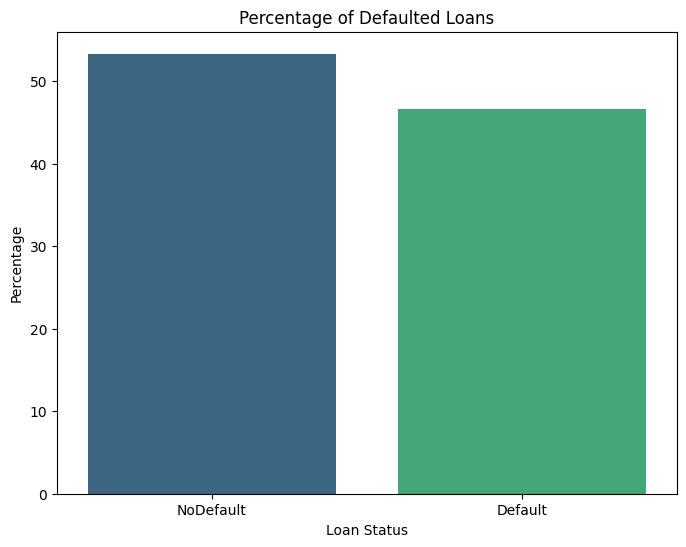

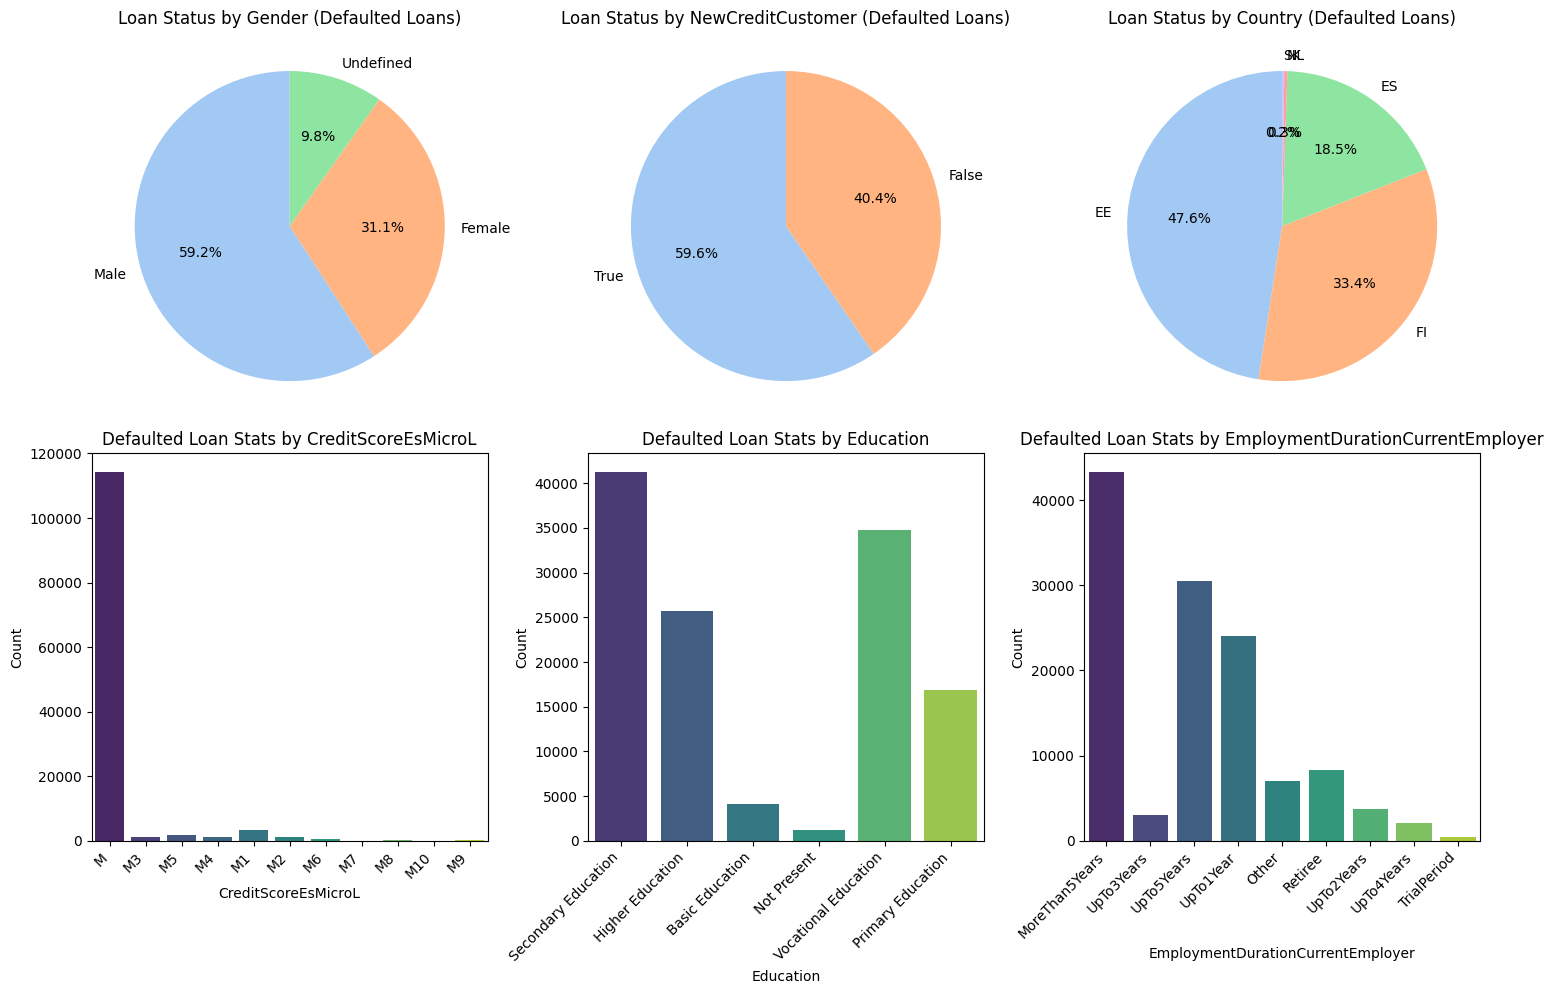

In [28]:


# Calculate the percentage of defaulted loans
defaulted_loan_percentage = (df['LoanStatus'].value_counts(normalize=True) * 100)

# Create a bar chart for the percentage of defaulted loans
plt.figure(figsize=(8, 6))
sns.barplot(x=defaulted_loan_percentage.index, y=defaulted_loan_percentage.values, palette='viridis')
plt.title('Percentage of Defaulted Loans')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

# Filter data for defaulted loans only
defaulted_loans = df[df['LoanStatus'] == 'Default']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Pie Charts (subplot 1)
# Loan Status by Gender
axes[0, 0].pie(defaulted_loans['Gender'].value_counts(), labels=defaulted_loans['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Loan Status by Gender (Defaulted Loans)')

# Loan Status by NewCreditCustomer
axes[0, 1].pie(defaulted_loans['NewCreditCustomer'].value_counts(), labels=defaulted_loans['NewCreditCustomer'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 1].set_title('Loan Status by NewCreditCustomer (Defaulted Loans)')

# Loan Status by Country
axes[0, 2].pie(defaulted_loans['Country'].value_counts(), labels=defaulted_loans['Country'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 2].set_title('Loan Status by Country (Defaulted Loans)')


# Bar charts for Defaulted Loan Stats by various features (subplot 2)
def plot_defaulted_loan_stats_by_feature(feature, ax):
    if feature in defaulted_loans.columns:
        sns.countplot(x=feature, data=defaulted_loans, palette='viridis', ax=ax)
        # sns.countplot(y=feature, data=defaulted_loans, palette='viridis', ax=ax)
        ax.set_title(f'Defaulted Loan Stats by {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        # Rotate x-axis labels and adjust alignment
        # The 'ha' parameter is not available in tick_params for axis labels.
        # Use set_xticklabels instead.
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        print(f"Error: Column '{feature}' not found in the DataFrame.")

plot_defaulted_loan_stats_by_feature('CreditScoreEsMicroL', axes[1, 0])
plot_defaulted_loan_stats_by_feature('Education', axes[1, 1])
plot_defaulted_loan_stats_by_feature('EmploymentDurationCurrentEmployer', axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()

### Numerical Feauture Distribution

In [29]:
df.select_dtypes(int).columns

Index(['LanguageCode', 'Age', 'LoanDuration', 'ExistingLiabilities',
       'RefinanceLiabilities'],
      dtype='object')

In [30]:
df.select_dtypes(float).columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'AppliedAmount',
       'Amount', 'Interest', 'MonthlyPayment', 'IncomeTotal',
       'LiabilitiesTotal', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

#### Age Distribution of Defaulters

Age Statistics for Defaulters:
count    123844.000000
mean         39.873333
std          12.489278
min           0.000000
25%          30.000000
50%          38.000000
75%          49.000000
max          77.000000
Name: Age, dtype: float64


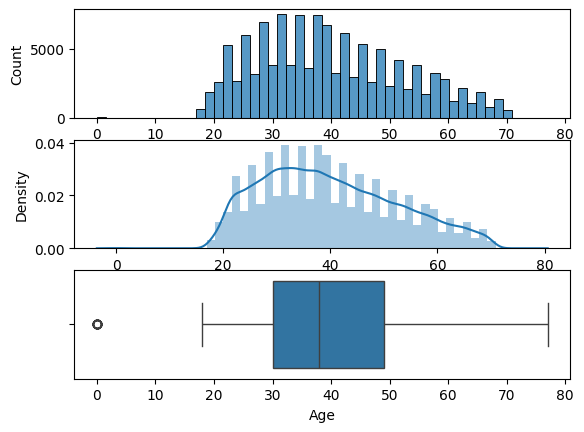

In [31]:
fig, axs = plt.subplots(nrows= 3)

sns.histplot(defaulted_loans['Age'], ax=axs[0], bins=50);
sns.distplot(defaulted_loans['Age'], ax=axs[1]);
sns.boxplot(defaulted_loans['Age'], ax=axs[2], orient='h');

# Descriptive statistics for age of defaulters
print("Age Statistics for Defaulters:")
print(defaulted_loans['Age'].describe())



- Mean age is approximately 40
- 1 outlier
- Data is almost symetrical

#### Monthly Payments Distribution

Monthly Payments Statistics for Defaulters:
count    122184.000000
mean        116.048092
std         108.808348
min           0.000000
25%          38.900000
50%          98.770000
75%         147.792500
max        2368.540000
Name: MonthlyPayment, dtype: float64


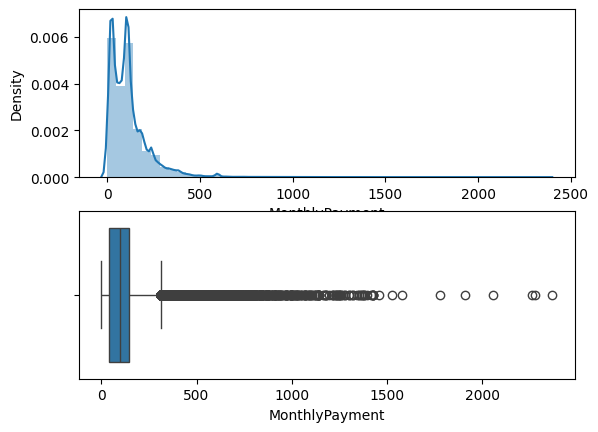

In [32]:
fig, axs = plt.subplots(nrows= 2)

# sns.histplot(defaulted_loans['MonthlyPayments'], ax=axs[0], bins=50);
sns.distplot(defaulted_loans['MonthlyPayment'], ax=axs[0]);
sns.boxplot(defaulted_loans['MonthlyPayment'], ax=axs[1], orient='h');

# Descriptive statistics for Monthly Payments of defaulters
print("Monthly Payments Statistics for Defaulters:")
print(defaulted_loans['MonthlyPayment'].describe())



- Mean is around 116, and it's right skewed, meaning the majority of the defaulted loans have lower monthly payments
- There is a large number of outliers, meaning a lot of defaulters have higher monthly payments above the upper limits

#### Amount Distribution of Defaulters

Applied Amount Statistics for Defaulters:
count    123844.000000
mean       2899.253024
std        2283.750196
min          31.955800
25%        1037.000000
50%        2200.000000
75%        4150.000000
max       12994.000000
Name: AppliedAmount, dtype: float64
Amount Statistics for Defaulters:
count    123844.000000
mean       2747.154803
std        2135.869532
min           6.390000
25%        1000.000000
50%        2126.000000
75%        4150.000000
max       12994.000000
Name: Amount, dtype: float64


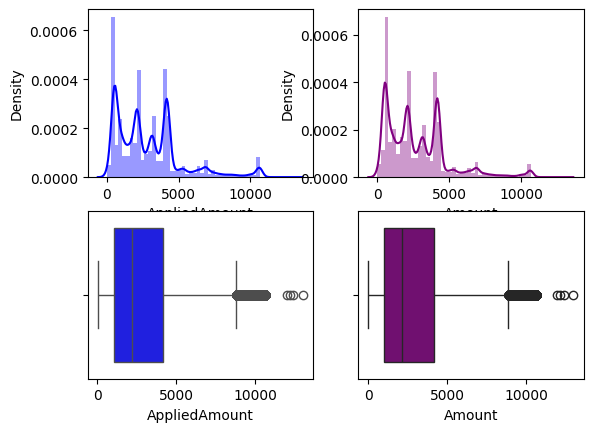

In [33]:
fig, axs = plt.subplots(nrows= 2, ncols= 2)

# Plots for Applied Amount
sns.distplot(defaulted_loans['AppliedAmount'], ax=axs[0,0], color='blue');
sns.boxplot(defaulted_loans['AppliedAmount'], ax=axs[1,0], orient='h', color='blue');

# Plots for Amount
sns.distplot(defaulted_loans['Amount'], ax=axs[0,1], color='purple');
sns.boxplot(defaulted_loans['Amount'], ax=axs[1,1], orient='h', color='purple');

# Descriptive statistics for Amount Applied for by defaulters
print("Applied Amount Statistics for Defaulters:")
print(defaulted_loans['AppliedAmount'].describe())

# Descriptive statistics for Amount given to defaulters
print("Amount Statistics for Defaulters:")
print(defaulted_loans['Amount'].describe())



- Mean value of The amount of money the Defaulter applied for originally is 2899, and what he/she recieves is 2747
- Data is right skewed in both.
- There is a large number of Outliers in both.

#### The Correlation Heatmap

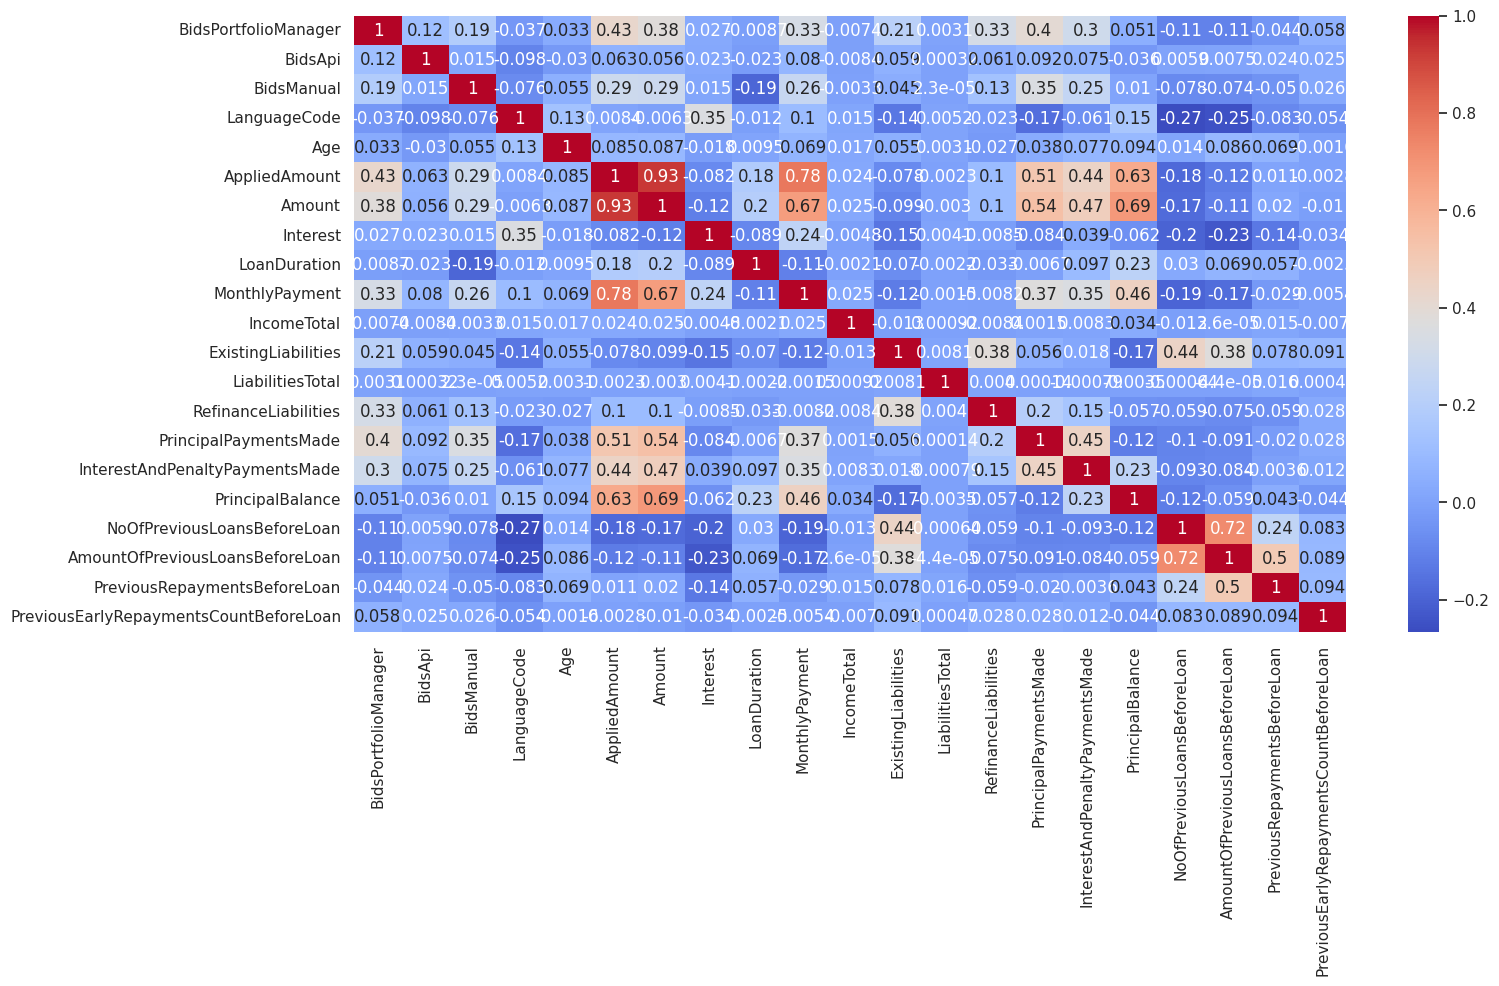

In [34]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
# Select only numerical features for correlation calculation
numerical_df = df[df.LoanStatus == 'Default'].select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

## Data Preparation Stage

Here, we will be:


1.   Hanling Missing Values
2.   Handling Outliers
2.   Categorical Feature Encoding
3.   Feature Selection
4.   Feature Scaling
5.   Data Splitting



#### Handle other missing values that might have been overlooked

In [35]:
# Check for remaining missing values in the DataFrame
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Remaining missing values:")
    print(missing_values)

    # Choose an appropriate strategy for handling each column:
    for column in missing_values.index:
        if df[column].dtype == 'object' or df[column].dtype == 'bool':
            # For categorical columns, fill with the mode (most frequent value)
            df[column].fillna(df[column].mode()[0], inplace=True)
        elif df[column].dtype in ['int64', 'float64']:
             # For numerical columns, fill with the median (less sensitive to outliers)
            df[column].fillna(df[column].median(), inplace=True)
        else:
            print(f"Warning: Unhandled data type for column '{column}'")

    # Verify that there are no more missing values
    remaining_missing = df.isnull().sum().sum()
    print(f"\nNumber of remaining missing values after handling: {remaining_missing}")
else:
    print("No missing values found.")


Remaining missing values:
MonthlyPayment                              6682
EmploymentDurationCurrentEmployer           4839
Rating                                      2733
NoOfPreviousLoansBeforeLoan                   77
AmountOfPreviousLoansBeforeLoan               77
PreviousRepaymentsBeforeLoan              103790
PreviousEarlyRepaymentsCountBeforeLoan        78
dtype: int64

Number of remaining missing values after handling: 0


### Handling Outliers

In [36]:
# Identify numerical features
numerical_features = df.select_dtypes(include=np.number).columns

# Create a dictionary to store IQR, Q1, and Q3 for each feature
iqr_data = {}

# Calculate and store IQR, Q1, and Q3
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Store in the dictionary
    iqr_data[col] = {'IQR': IQR, 'Q1': Q1, 'Q3': Q3}
print(iqr_data)

{'BidsPortfolioManager': {'IQR': np.float64(488.0), 'Q1': np.float64(12.0), 'Q3': np.float64(500.0)}, 'BidsApi': {'IQR': np.float64(2.0), 'Q1': np.float64(0.0), 'Q3': np.float64(2.0)}, 'BidsManual': {'IQR': np.float64(350.0), 'Q1': np.float64(5.0), 'Q3': np.float64(355.0)}, 'LanguageCode': {'IQR': np.float64(3.0), 'Q1': np.float64(1.0), 'Q3': np.float64(4.0)}, 'Age': {'IQR': np.float64(18.0), 'Q1': np.float64(30.0), 'Q3': np.float64(48.0)}, 'AppliedAmount': {'IQR': np.float64(3406.0), 'Q1': np.float64(740.0), 'Q3': np.float64(4146.0)}, 'Amount': {'IQR': np.float64(3420.0), 'Q1': np.float64(726.0), 'Q3': np.float64(4146.0)}, 'Interest': {'IQR': np.float64(16.68), 'Q1': np.float64(19.32), 'Q3': np.float64(36.0)}, 'LoanDuration': {'IQR': np.float64(24.0), 'Q1': np.float64(36.0), 'Q3': np.float64(60.0)}, 'MonthlyPayment': {'IQR': np.float64(93.78500000000001), 'Q1': np.float64(36.3), 'Q3': np.float64(130.085)}, 'IncomeTotal': {'IQR': np.float64(1300.0), 'Q1': np.float64(1000.0), 'Q3': np.f

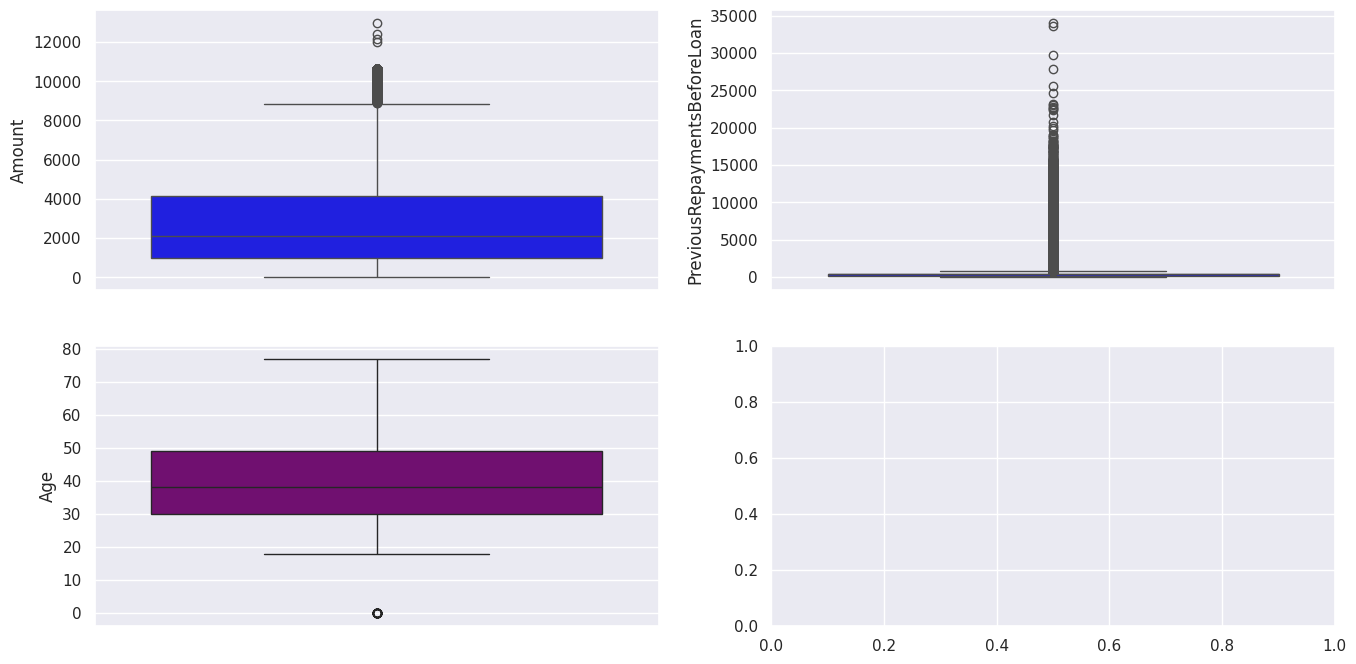

In [37]:
#Box plots before handling outliers
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[0,1], color='blue');
sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,0], color='purple');

In [38]:
# Replace outliers in the actual DataFrame (df)
for col in numerical_features:
    # Calculate upper and lower bounds
    upper_bound = iqr_data[col]['Q3'] + 1.5 * iqr_data[col]['IQR']
    lower_bound = iqr_data[col]['Q1'] - 1.5 * iqr_data[col]['IQR']

    # Replace outliers directly in df
    df[col] = np.clip(df[col], lower_bound, upper_bound)

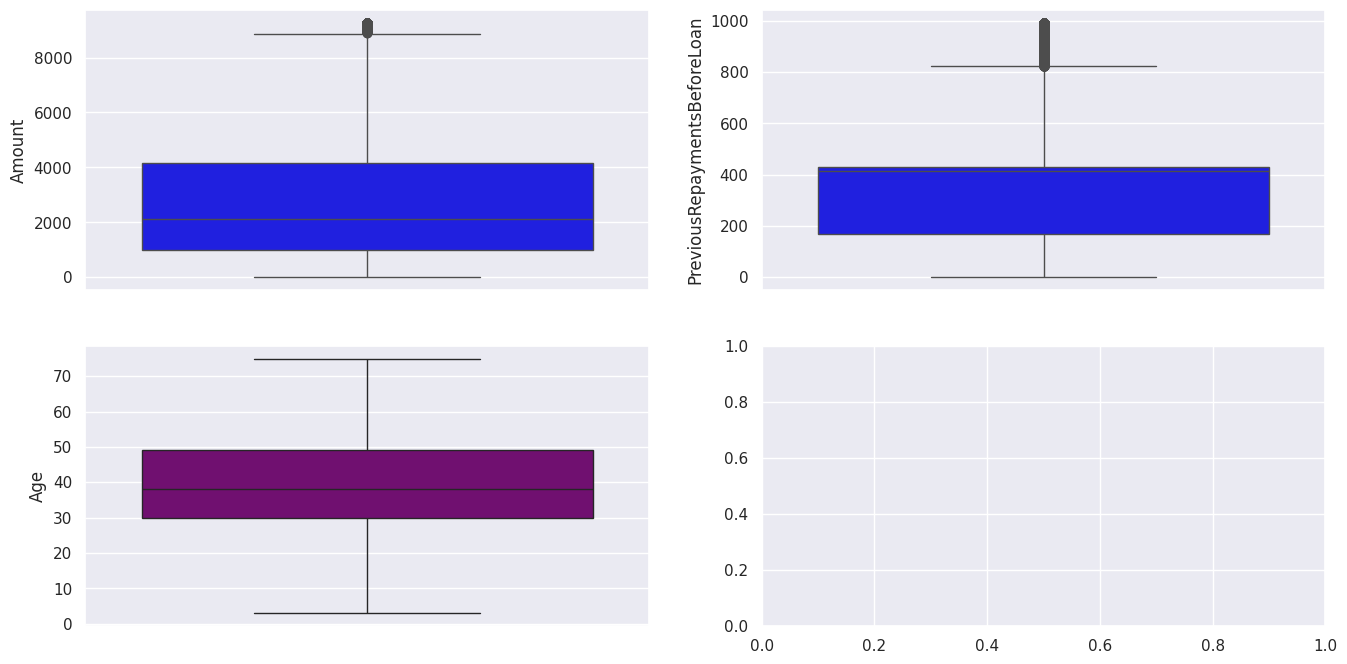

In [39]:
# Check, boxplot after handling outliers:
fig, axs = plt.subplots(nrows=2, ncols= 2)
sns.boxplot(df.Amount[df.LoanStatus=='Default'], ax=axs[0,0], color='blue')
sns.boxplot(df.PreviousRepaymentsBeforeLoan[df.LoanStatus=='Default'], ax=axs[0,1], color='blue');

sns.boxplot(df.Age[df.LoanStatus=='Default'], ax=axs[1,0], color='purple');


### Feature Encoding

In [40]:
# Divide into target and dependent features
y = df['LoanStatus']
X = df.drop(columns=['LoanStatus'])

In [41]:
# Perform Categorical feature encoding using label encoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Target Feature Encoding
y = le.fit_transform(y)

# Categorical Feature Encoding
for feature in X.select_dtypes(object, bool):
    X[feature] = le.fit_transform(X[feature])

In [42]:
y

array([1, 0, 1, ..., 1, 1, 1])

### Feature Selection


#### Using Correlation Filte:
 -  Highly Correlated features will be considered duplicates. We will drop one and leave the other

{'AmountOfPreviousLoansBeforeLoan', 'Rating', 'Amount'}


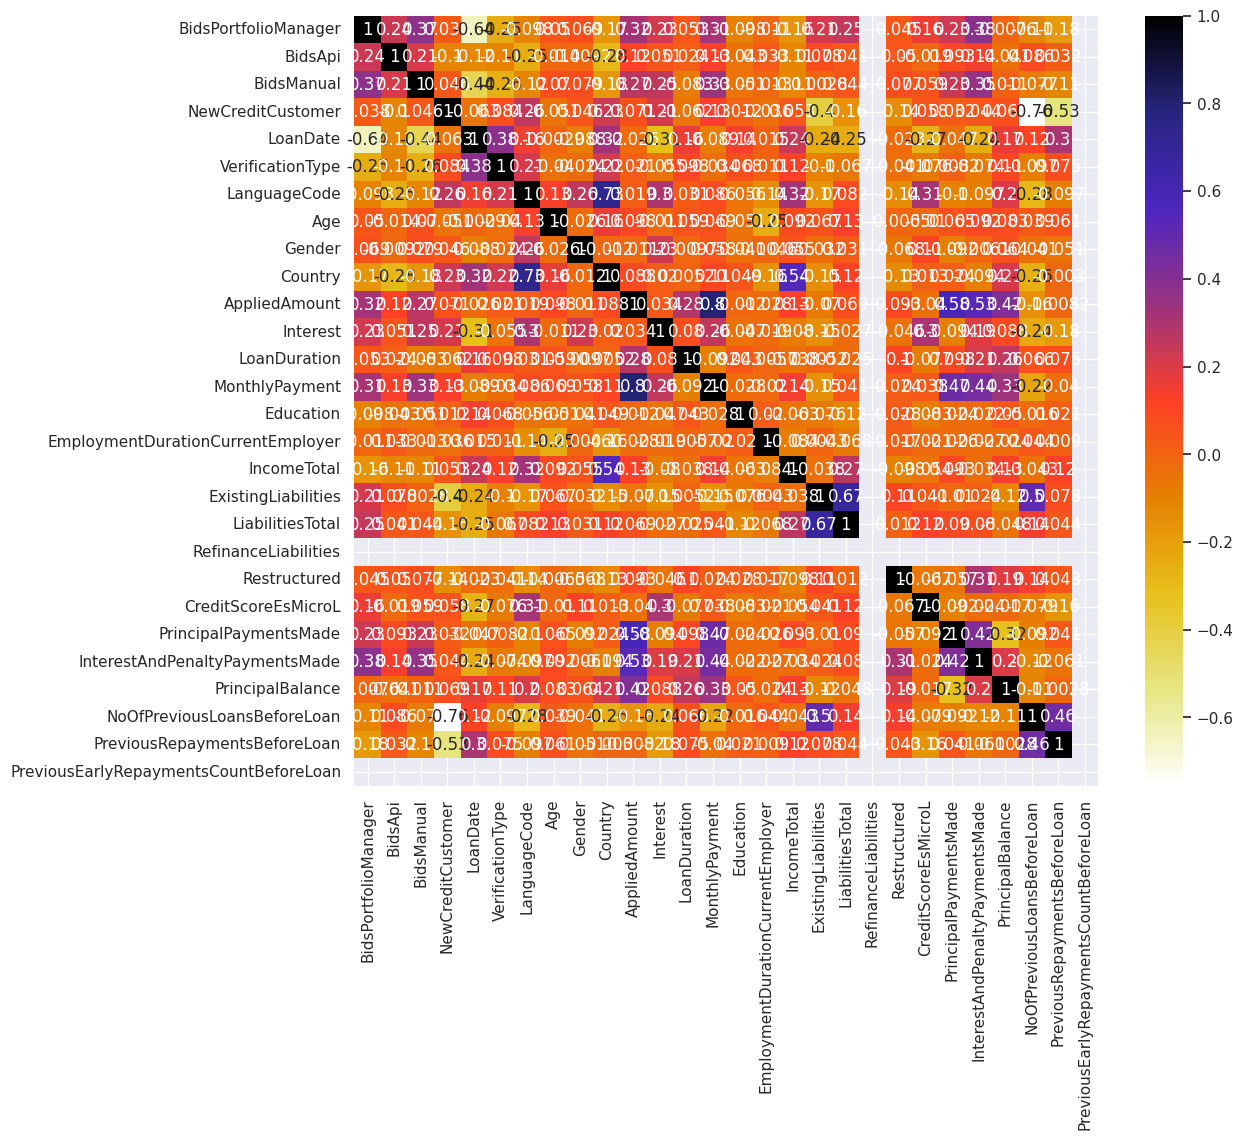

In [43]:
# prompt: Produce the heat map, Use a function to select highly correlated features (Threshold of 0.8)

# import matplotlib.pyplot as plt
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print(corr_features)
X = X.drop(corr_features,axis=1)
# Heatmap after removing highly correlated features
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [44]:
# Using Scikit
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, mutual_info_classif, f_classif
# using mutual_info_classif to choose our features
features = SelectKBest(mutual_info_classif, k=15)
# Selected features
Selected_features =   features.fit_transform(X, y)

In [45]:
# Display selected features
X.columns[features.get_support()]

Index(['BidsPortfolioManager', 'BidsManual', 'LoanDate', 'VerificationType',
       'LanguageCode', 'Country', 'AppliedAmount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'Restructured', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'PreviousRepaymentsBeforeLoan'],
      dtype='object')

### Feature Scaling Using Standardization
We can use StandardScalar to scale our data:
- StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.
- The values will lie be between -1 and 1.

In [46]:
# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Split the *Data*

In [47]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print size of split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (212344, 28)
X_test shape: (53087, 28)
y_train shape: (212344,)
y_test shape: (53087,)


## Model Building


Training logistic_regression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Training linear_svm...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Training random_forest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
                 model  best_score                               best_params  \
0  logistic_regression    0.820849              {'C': 0.1, 'max_iter': 1000}   
1           linear_svm    0.819904              {'C': 1.0, 'max_iter': 1000}   
2        random_forest    0.931649  {'max_depth': None, 'n_estimators': 200}   

   precision    recall       auc        f1  
0   0.819873  0.821827  0.893440  0.820849  
1   0.819579  0.820231  0.893117  0.819904  
2   0.925416  0.937966  0.980686  0.931649  


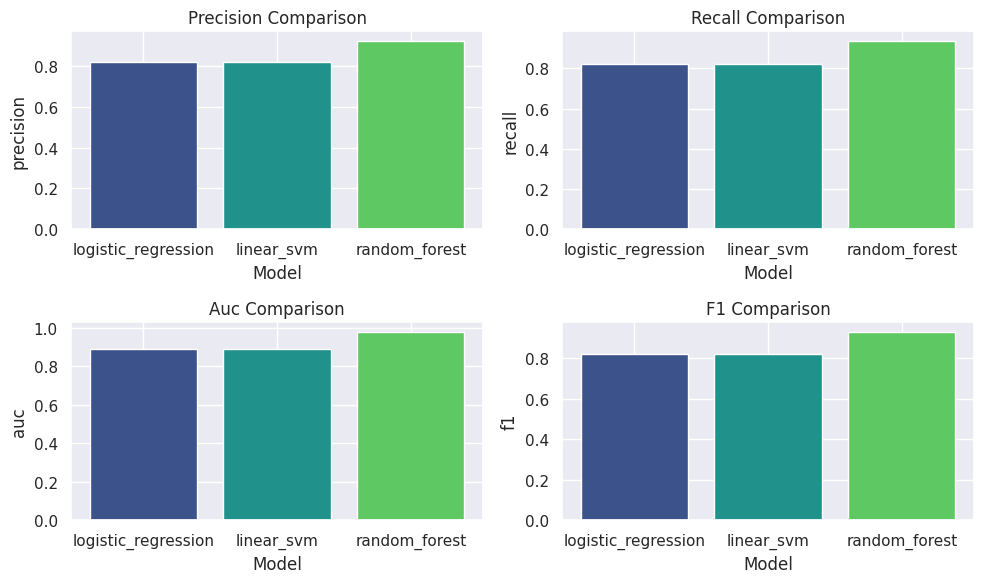

In [48]:
# Define models and hyperparameters (reduced for speed)
algos = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1.0],
            'max_iter': [1000]
        }
    },
    'linear_svm': {
        'model': LinearSVC(),
        'params': {
            'C': [0.1, 1.0],
            'max_iter': [1000]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10]
        }
    }
}

# Perform Grid Search with KFold and multiple metrics
cv = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced splits for speed
scores = []

for algo_name, mp in algos.items():
    print(f"\nTraining {algo_name}...")
    gs = GridSearchCV(
        mp['model'],
        mp['params'],
        cv=cv,
        scoring={'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'auc': 'roc_auc'},
        refit='f1',  # Optimize for F1 score
        n_jobs=-1,  # Use all CPU cores
        verbose=1
    )
    gs.fit(X_train, y_train)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,  # This will be the F1 score
        'best_params': gs.best_params_,
        'precision': gs.cv_results_['mean_test_precision'][gs.best_index_],
        'recall': gs.cv_results_['mean_test_recall'][gs.best_index_],
        'auc': gs.cv_results_['mean_test_auc'][gs.best_index_],
        'f1': gs.cv_results_['mean_test_f1'][gs.best_index_]  # Added F1 score
    })

# Convert Result to DataFrame
result_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'precision', 'recall', 'auc', 'f1'])
print(result_df)

# Plot Comparision of model performance
plt.figure(figsize=(10, 6))
metrics = ['precision', 'recall', 'auc', 'f1']
colors = sns.color_palette("viridis", n_colors=len(result_df['model']))

for metric in metrics:
    plt.subplot(2, 2, metrics.index(metric) + 1)
    # create bar chart of metrics for each model.
    plt.bar(result_df['model'], result_df[metric], color=colors)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric.capitalize()} Comparison')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


## Model Evaluation
This evaluation contains:
1. Key Metrics
    - Accuracy: Overall correctness (but misleading for imbalanced datasets).
    - Precision & Recall:
    - Precision (Positive Predictive Value): How many predicted defaults were actual defaults?
    - Recall (Sensitivity): How many actual defaults were correctly predicted? If high recall is needed (avoid missing risky borrowers), focus on recall.
2. Business Cost Analysis
    - Evaluation of financial impact of FN vs FP
    - Total Misclassificatioin cost for better decision making
3. Model Explainability
   - LIME (Local Interpretable Model-Agnostic Explanations Explanations): Which features contribute most to predictions?
   - Feature Importance (for tree-based models): Identify the top predictive factors.

In [49]:
# Select the best model based on Recall (to reduce FN)
best_model_data = max(scores, key=lambda x: x['recall'])  # Change from F1 to Recall
best_model = algos[best_model_data['model']]['model'].set_params(**best_model_data['best_params'])
best_model.fit(X_train, y_train)

print(f"\nBest Model: {best_model_data['model']}")
print(f"Best Parameters: {best_model_data['best_params']}")


Best Model: random_forest
Best Parameters: {'max_depth': None, 'n_estimators': 200}


### Treshold Tuning for False Negative Reduction

In [50]:
best_threshold = 0.5  # Default
best_recall = 0  # Track the best recall
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the "default" class

for t in np.linspace(0.1, 0.5, 10):  # Try different thresholds
    y_pred_temp = np.where(y_probs >= t, 1, 0)
    recall_temp = recall_score(y_test, y_pred_temp)

    if recall_temp > best_recall:  # Keep the threshold with highest recall
        best_recall = recall_temp
        best_threshold = t

print(f"Optimal threshold for recall: {best_threshold:.2f}")


Optimal threshold for recall: 0.10


In [64]:
# Predictions with adjusted threshold to reduce FN
# threshold = best_threshold  # Use best threshold to catch more defaulters
threshold = 0.3  # Use best threshold to catch more defaulters

y_pred = np.where(y_probs >= threshold, 1, 0)  # Convert probabilities to class labels

# Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # This should improve
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)  # Use probability-based AUC

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9078
Precision: 0.8636
Recall: 0.9820
F1 Score: 0.9190
AUC: 0.9834

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     24827
           1       0.86      0.98      0.92     28260

    accuracy                           0.91     53087
   macro avg       0.92      0.90      0.91     53087
weighted avg       0.92      0.91      0.91     53087



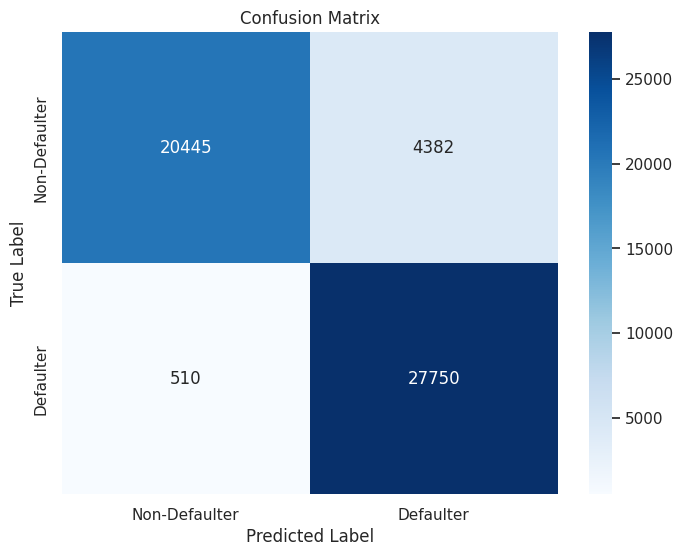

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Defaulter", "Defaulter"],
            yticklabels=["Non-Defaulter", "Defaulter"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Precision Recall Curve

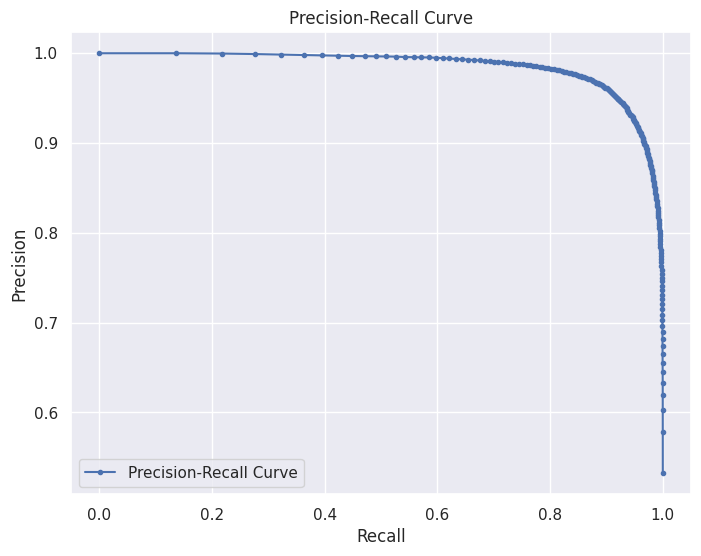

In [53]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


###

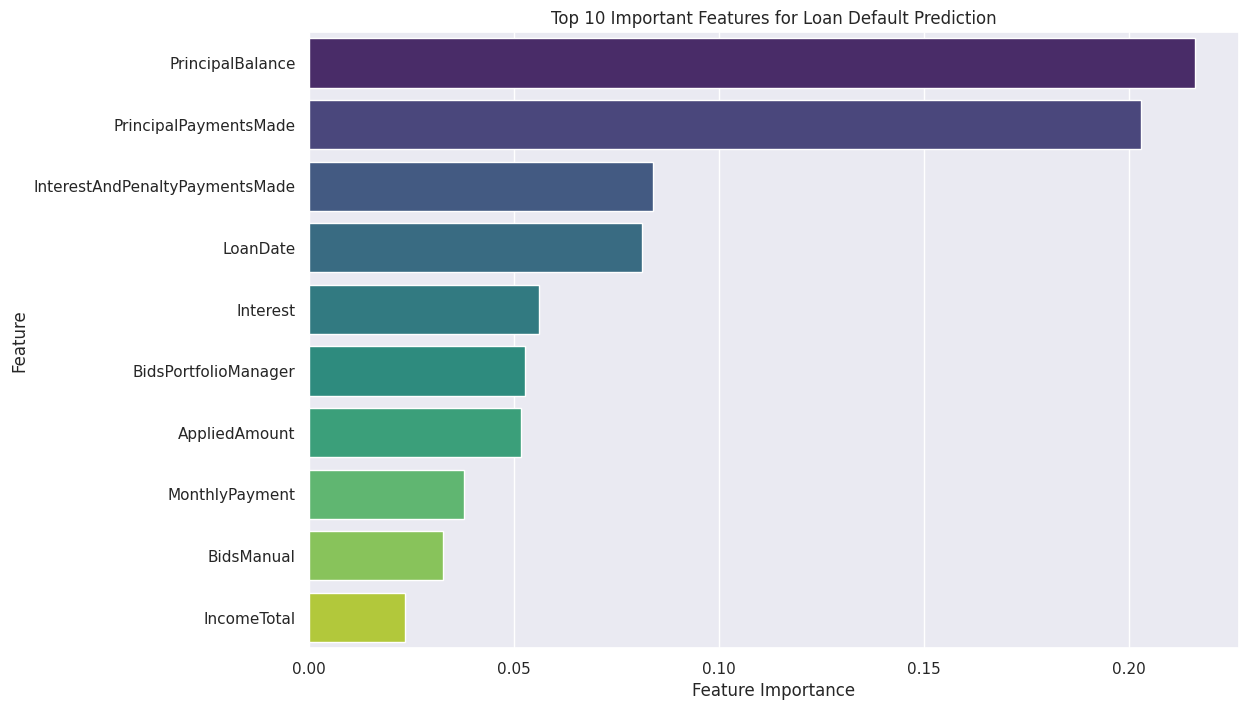

In [66]:
# Feature Importance
# Assuming 'best_model' is your trained model and 'original_feature_names' contains the original feature names
importances = best_model.feature_importances_

# Define original_feature_names, excluding columns in corr_features
original_feature_names = df.drop(columns=['LoanStatus', *list(corr_features)]).columns

# Create a DataFrame
feature_importances_df = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Feature Importance Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.barplot(x="importance", y="feature", data=feature_importances_df.head(10), palette="viridis")
plt.title("Top 10 Important Features for Loan Default Prediction")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

### Business Cost Analysis

Estimated Business Cost of the Model: €4,741,000


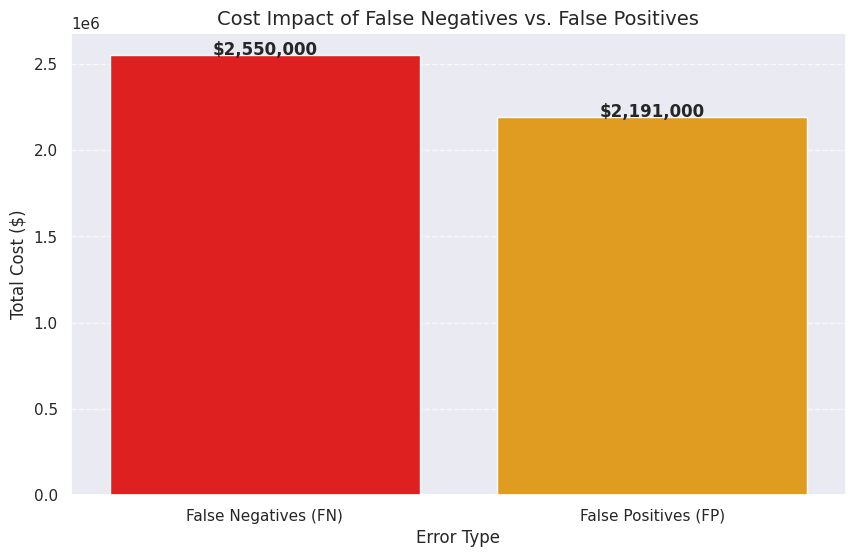

In [67]:
# Define business costs (Assumed values, update as needed)
FN_cost = 5000  # Cost of missing a defaulter (False Negative)
FP_cost = 500   # Cost of wrongly flagging a good customer (False Positive)

# Extract FN and FP counts from Confusion Matrix
fn_count = cm[1, 0]  # False Negatives
fp_count = cm[0, 1]  # False Positives

# Compute total costs
fn_total_cost = FN_cost * fn_count
fp_total_cost = FP_cost * fp_count
total_misclassification_cost = fn_total_cost + fp_total_cost

print(f"Estimated Business Cost of the Model: €{total_misclassification_cost:,}")

# Visualization of False Negatives vs False Positives Impact
plt.figure(figsize=(10, 6))
sns.barplot(x=["False Negatives (FN)", "False Positives (FP)"],
            y=[fn_total_cost, fp_total_cost],
            palette=["red", "orange"])

# Annotate values
for i, cost in enumerate([fn_total_cost, fp_total_cost]):
    plt.text(i, cost + 1000, f"${cost:,}", ha='center', fontsize=12, fontweight='bold')

plt.title("Cost Impact of False Negatives vs. False Positives", fontsize=14)
plt.ylabel("Total Cost ($)", fontsize=12)
plt.xlabel("Error Type", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Model Explainability

###  Model Explainability with LIME

In [56]:
original_feature_names = df.drop(columns=['LoanStatus', *list(corr_features)]).columns

explainer = LimeTabularExplainer(X_train,
                                 feature_names=original_feature_names,
                                 class_names=['NoDefault', 'Default'],
                                 discretize_continuous=True)

# Explain an instance (e.g., the first row of X_test)
i = 0
exp = explainer.explain_instance(X_test[i], best_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)